# Linear Regression for all the 3 stocks based on User selection.


The data taken here is a complete set with tweet info

In [3]:
import pandas_datareader as pdr
import pandas as pd 
import datetime
import pandas_ta

In [17]:
#!pip install pandas_ta

In [86]:
print ("Enter one of these values from doge / tesla/ twitter")
selected_value = input()

Enter one of these values from doge / tesla/ twitter
doge


In [87]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [88]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_Stock = SqlConn.fetchTweetSentimentForModelling(selected_value)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [89]:
selected_value

'doge'

In [90]:
df_Stock

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount,sentimentScore,sentiment,adjustedClose,volume
0,1113009339743100928,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.300,Positive,0.002795,60298362
1,1113009339743100928,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.300,Positive,33.750000,11638000
2,1113009339743100928,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.300,Positive,57.175999,27394500
3,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.000,Neutral,0.002795,60298362
4,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893,16539,0.000,Neutral,33.750000,11638000
...,...,...,...,...,...,...,...,...,...,...,...
183,1531699416490557440,doge,2022-05-31,You’re humble bro. Billy’s sense of humor &amp...,NaN,12204,1237,0.100,Positive,758.260010,33971500
184,1538406040374595584,doge,2022-06-19,I will keep supporting Dogecoin,NaN,396566,37467,0.250,Positive,0.060396,1166163984
185,1544743525585141760,doge,2022-07-06,Supporting Doge wherever possible,NaN,10646,2085,0.125,Positive,0.068583,398926503
186,1544743525585141760,doge,2022-07-06,Supporting Doge wherever possible,NaN,10646,2085,0.125,Positive,38.209999,4870300


In [91]:
df_Stock["date"] = pd.to_datetime(df_Stock["date"])
df_Stock.set_index("date", inplace=True)
df_Stock

,tweetID,financeType,fullText,replyCount,likesCount,retweetCount,sentimentScore,sentiment,adjustedClose,volume
date,,,,,,,,,,
2019-04-02,1113009339743100928,doge,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.300,Positive,0.002795,60298362
2019-04-02,1113009339743100928,doge,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.300,Positive,33.750000,11638000
2019-04-02,1113009339743100928,doge,Dogecoin might be my fav cryptocurrency. It’s ...,558.0,9063,2428,0.300,Positive,57.175999,27394500
2019-04-02,1113173498384441344,doge,Dogecoin rulz,1732.0,138893,16539,0.000,Neutral,0.002795,60298362
2019-04-02,1113173498384441344,doge,Dogecoin rulz,1732.0,138893,16539,0.000,Neutral,33.750000,11638000
...,...,...,...,...,...,...,...,...,...,...
2022-05-31,1531699416490557440,doge,You’re humble bro. Billy’s sense of humor &amp...,NaN,12204,1237,0.100,Positive,758.260010,33971500
2022-06-19,1538406040374595584,doge,I will keep supporting Dogecoin,NaN,396566,37467,0.250,Positive,0.060396,1166163984
2022-07-06,1544743525585141760,doge,Supporting Doge wherever possible,NaN,10646,2085,0.125,Positive,0.068583,398926503


In [92]:
df_AdjustedClose = df_Stock[['adjustedClose','sentimentScore']]


In [93]:
df_AdjustedClose

,adjustedClose,sentimentScore
date,,
2019-04-02,0.002795,0.300
2019-04-02,33.750000,0.300
2019-04-02,57.175999,0.300
2019-04-02,0.002795,0.000
2019-04-02,33.750000,0.000
...,...,...
2022-05-31,758.260010,0.100
2022-06-19,0.060396,0.250
2022-07-06,0.068583,0.125


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2019-04-02 to 2022-07-06
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adjustedClose   188 non-null    float64
 1   sentimentScore  188 non-null    float64
dtypes: float64(2)
memory usage: 4.4 KB
None


<AxesSubplot:xlabel='date'>

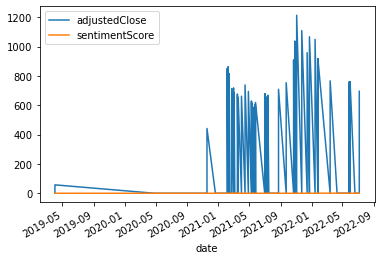

In [94]:
print(df_AdjustedClose.info())
df_AdjustedClose.plot()

In [95]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)

C:\Users\15125\AppData\Local\Temp/ipykernel_25964/668832598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)


date
2019-04-02           NaN
2019-04-02           NaN
2019-04-02           NaN
2019-04-02           NaN
2019-04-02           NaN
                 ...    
2022-05-31    314.463631
2022-06-19    257.299407
2022-07-06    210.530166
2022-07-06    179.199227
2022-07-06    273.017551
Name: EMA_10, Length: 188, dtype: float64

In [96]:
# Print the first 20 entries of our data
df_AdjustedClose.head(20)

,adjustedClose,sentimentScore,EMA_10
date,,,
2019-04-02,0.002795,0.300,NaN
2019-04-02,33.750000,0.300,NaN
2019-04-02,57.175999,0.300,NaN
2019-04-02,0.002795,0.000,NaN
2019-04-02,33.750000,0.000,NaN
2019-04-02,57.175999,0.000,NaN
2019-04-02,0.002795,0.000,NaN
2019-04-02,33.750000,0.000,NaN
2019-04-02,57.175999,0.000,NaN


In [97]:
# Drop the first n-rows
df_AdjustedClose.dropna(inplace=True)
# View our newly-formed dataset
df_AdjustedClose.head(10)

C:\Users\15125\AppData\Local\Temp/ipykernel_25964/1199575657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.dropna(inplace=True)


,adjustedClose,sentimentScore,EMA_10
date,,,
2020-04-25,0.002142,0.000,27.278852
2020-07-18,0.003473,-0.025,22.319693
2020-11-17,0.002936,0.000,18.262100
2020-11-17,42.849998,0.000,22.732627
2020-11-17,441.609985,0.000,98.892147
2020-12-20,0.004625,0.000,80.912597
2021-02-04,0.053289,0.000,66.210905
2021-02-04,56.509998,0.000,64.447104
2021-02-04,849.989990,0.000,207.273083


<AxesSubplot:xlabel='date'>

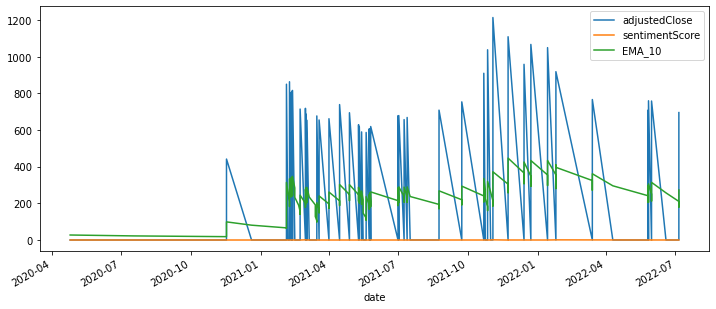

In [98]:
df_AdjustedClose.plot(figsize=(12,5))

In [99]:
 from sklearn.model_selection import train_test_split

In [100]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_AdjustedClose[['adjustedClose']], df_AdjustedClose[['sentimentScore']], test_size=.2)
# Test set
print(X_test.describe())

       adjustedClose
count      36.000000
mean      234.070136
std       336.411469
min         0.050599
25%         0.264414
50%        47.289999
75%       620.267501
max       958.510010


In [101]:
# Training set
print(X_train.describe())

       adjustedClose
count     143.000000
mean      247.385961
std       359.209842
min         0.002142
25%         0.209933
50%        54.529999
75%       610.945007
max      1213.859985


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[4.97003188e-06]]
Mean Absolute Error: 0.17992178195897765
Coefficient of Determination: -0.07317878720972915


In [104]:
dfpred = pd.DataFrame(y_pred)
dfpred.columns=["y_pred"]
dfpred

,y_pred
0,0.073052
1,0.076341
2,0.076724
3,0.073309
4,0.073053
5,0.073052
6,0.076416
7,0.073054
8,0.076724
9,0.073053


In [105]:
y_test

,sentimentScore
date,
2021-02-15,0.218750
2021-04-01,0.000000
2021-04-15,0.000000
2021-05-14,0.200000
2021-11-23,0.125000
2021-02-08,-0.125000
2021-03-16,0.000000
2021-05-20,0.200000
2021-04-15,0.000000


In [106]:
df_trend = y_test.copy()
df_trend["y_pred"]=y_pred
df_trend

,sentimentScore,y_pred
date,,
2021-02-15,0.218750,0.073052
2021-04-01,0.000000,0.076341
2021-04-15,0.000000,0.076724
2021-05-14,0.200000,0.073309
2021-11-23,0.125000,0.073053
2021-02-08,-0.125000,0.073052
2021-03-16,0.000000,0.076416
2021-05-20,0.200000,0.073054
2021-04-15,0.000000,0.076724


<AxesSubplot:xlabel='date'>

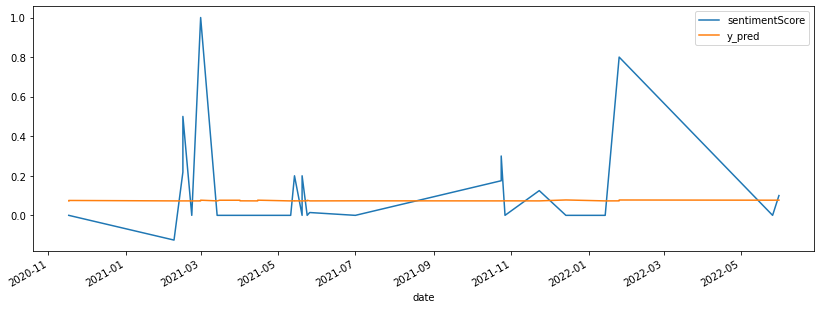

In [107]:
df_trend.plot(figsize=(14,5))
#That looks like whatever is the sentiment score the adjust value will not be impacted.

In [108]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

0.7690942510808927
0.02695582700182164


C:\Users\15125\AppData\Local\Temp/ipykernel_25964/3969865832.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


In [109]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
# Printout relevant metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
# print("Accuracy",accuracy_score(y_test,y_pred)) - not supported for continous data
# MAE 63 is very high difference between actual vs predicted - Loss is high - deviation from Actual is high
# COD 39% of the data fit the model

Mean Absolute Error: 0.17992178195897765
Coefficient of Determination: -0.07317878720972915


In [110]:
# Coefficient of Determination: 0.9925133513467957 close to 1, means the model is nearly perfectly fit
# Mean Absolute Error: 16.136803174699697 this value is high should be close to 0 for a best prediction
# Model Cofficients :[[0.99243097]] - X and Y are closely related -moving avergae does not have deviation from the actual values


In [111]:
predictions_reg = model.predict(X_test)
predictions_reg

array([ 0.01035417, -0.209     ,  0.25338095,  0.2352    , -0.08699167,
        0.002     , -0.0075    ,  0.03214167,  0.25338095, -0.0034    ,
       -0.00653333,  0.2377    ,  0.00875   ,  0.00875   ,  0.63175714,
        0.46316667, -0.00597143,  0.19961667,  0.        , -0.0034    ,
        0.10208889,  0.01035417,  0.09025   ,  0.11231093,  0.03426772,
        0.0068875 ,  0.23      ,  0.45958333,  0.21065278,  0.23      ,
        0.03214167,  0.18004365,  0.00357143,  0.02485   ,  0.07409167,
        0.08775   ])

In [112]:
dfpred_reg = pd.DataFrame(predictions_reg)
dfpred_reg.columns=["y_pred"]
dfpred_reg

,y_pred
0,0.010354
1,-0.209000
2,0.253381
3,0.235200
4,-0.086992
5,0.002000
6,-0.007500
7,0.032142
8,0.253381
9,-0.003400


In [113]:
df_reg = y_test.copy()
df_reg["y_pred"]=y_pred
df_reg

,sentimentScore,y_pred
date,,
2021-02-15,0.218750,0.073052
2021-04-01,0.000000,0.076341
2021-04-15,0.000000,0.076724
2021-05-14,0.200000,0.073309
2021-11-23,0.125000,0.073053
2021-02-08,-0.125000,0.073052
2021-03-16,0.000000,0.076416
2021-05-20,0.200000,0.073054
2021-04-15,0.000000,0.076724


<AxesSubplot:xlabel='date'>

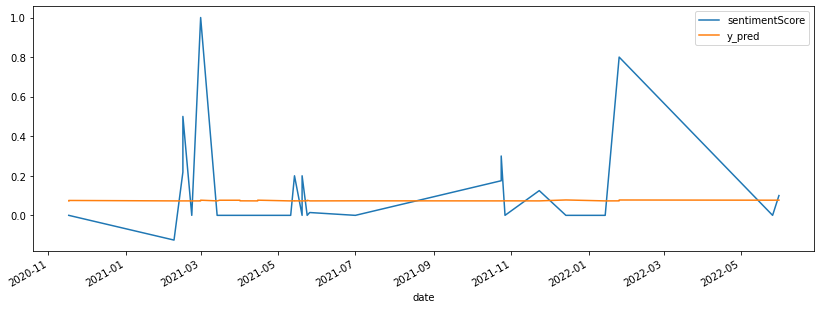

In [114]:
df_reg.plot(figsize=(14,5))